In [15]:
import numpy as np
from numpy import radians

### Criação da aeronave

In [16]:
# Creates vehicle and set values
from pyaat.aircraft import Aircraft
minhaAeronave = Aircraft(mass=45e3, Ixx=0.554e6, Iyy=2.53e6,
                         Izz =3.01e6, Izx=0.106e6, Cbarw =3.666,
                         bw=28.42, Sw=95.0)

# Aerodynamic coeficients
minhaAeronave.coef0 = [0.0252, 0.0, 0.382, 0.0, 0.0622, 0.0]
minhaAeronave.coefALPHA = [0.2010, 0.0, 6.29, 0.0, -3.63, 0.0]
minhaAeronave.coefBETA = [0.0, 0.785, 0.0, -0.121, 0.0, 0.174]
minhaAeronave.coefP = [0.0, -0.0794, 0.0, -0.522, 0.0, -0.0587]
minhaAeronave.coefQ = [0.281, 0.0, 14.6, 0.0, -45.5, 0.0]
minhaAeronave.coefR = [0.0, 0.572, 0.0, 0.254, 0.0, -0.277]

minhaAeronave.CLmax = 2.4
minhaAeronave.qmax = 23052.05 # considering 700km/h at sea level
minhaAeronave.Vinf = 200

# Environment

minhaAeronave.set_control_surface('Profundor', [0.0126, 0.0, 0.3891, 0.0, -1.5980, 0.0],(radians(-30), radians(30)))
minhaAeronave.set_control_surface('Aileron', [0.0, 0.0094, 0.0, -0.1784, 0.0, 0.0080],(radians(-20), radians(30)))
minhaAeronave.set_control_surface('Leme', [0.0, -0.3030, 0.0, -0.0464, 0.0, -0.1594],(radians(-40), radians(40)))

### Criação da atmosfera

In [17]:
from pyaat.atmosphere import atmosISA
minhaAtmosfera = atmosISA()

### Criação da gravidade

In [18]:
from pyaat.gravity import Earth_NewtonGravity
minhaGravidade = Earth_NewtonGravity()

### Criação do modelo propulsivo

In [19]:
from pyaat.propulsion import JetModel
MotorEsquerdo = JetModel('Motor esquerdo', Fmaxi = 35e3, nrho = 0.775, rhoi = 0.41271,
                         Vi = 200.0, nv = 0)
MotorEsquerdo.set_position(np.array([0, -5, 1.42]))
MotorEsquerdo.set_attitude(np.array([0., radians(0.), 0.]))

MotorDireito = JetModel('Motor direito', Fmaxi = 35e3, nrho = 0.775, rhoi = 0.41271,
                         Vi = 200.0, nv = 0)
MotorDireito.set_position(np.array([0, 5.0, 1.42]))
MotorDireito.set_attitude(np.array([0., radians(0.), 0.]))

minhaPropulsao = [MotorEsquerdo, MotorDireito]

### Criação do sistema

In [20]:
from pyaat.system import system
meuSistema = system(atmosphere = minhaAtmosfera,
                    propulsion = minhaPropulsao,
                    aircraft = minhaAeronave,
                    gravity = minhaGravidade)

### Cálculo do balanço

In [21]:
varFixas = {'zo':-10000.0,
            'u': 224.6,
            'phi':0.0,
            'Motor esquerdo phip':0.0,
            'Motor direito phip': 0.0,
            'Motor esquerdo thetap':np.radians(3.0),
            'Motor direito thetap': np.radians(3.0),
            'v': 0.0,}

varDesejadas = {'zod':0.0,
                'ud':0.0,
                'vd':0.0,
                'wd':0.0,
                'phid':0.0,
                'psid': 0.0,
                'thetad':0.0,
                'pd':0.0,
                'qd':0.0,
                'rd':0.0}

varLivres = {'w':1.0,
             'theta':1.0,
             'p': 1.0,
             'q':1.0,
             'r':1.0,
             'Motor direito thrust': 0.5,
             'Aileron': np.radians(1.0),
             'Profundor':0.0,
             'Leme': np.radians(0.5)}

varDep = {'Motor esquerdo thrust': 'Motor direito thrust'}

Xe, Ue = meuSistema.trimmer(condition='general', fixed=varFixas, dependent=varDep,
                            desired=varDesejadas, free=varLivres)

In [22]:
Xe, Ue = meuSistema.trimmer(condition = 'turn', zo = -10000, u = 224.6, psid = np.radians(5.), beta = np.radians(0))

In [23]:
solution1, controls1 = meuSistema.propagate(Xe, Ue, T0 = 0.0, TF = 300, dt = 0.01)
tempo1  = meuSistema.time

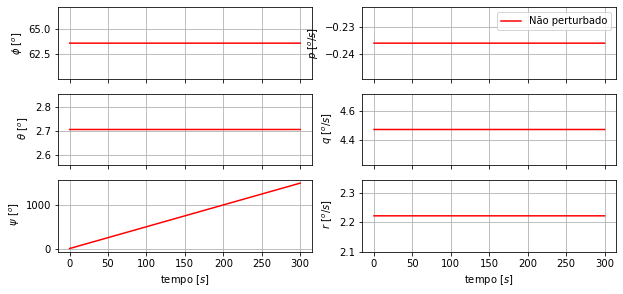

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(10,4.5))
ax[0,0].plot(tempo1, np.around(np.degrees(solution1[:,6]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[0,0].set_ylabel(r'$\phi~ [^o]$')
ax[0,0].grid()

ax[1,0].plot(tempo1, np.around(np.degrees(solution1[:,7]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[1,0].set_ylabel(r' $\theta~ [^o]$')
ax[1,0].grid()

ax[2,0].plot(tempo1, np.around(np.degrees(solution1[:,8]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[2,0].set_ylabel(r' $\psi~ [^o]$')
ax[2,0].set_xlabel(r'tempo $[s]$')
ax[2,0].grid()

ax[0, 1].plot(tempo1, np.around(np.degrees(solution1[:,9]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[0, 1].set_ylabel(r'$p~ [^o/s]$')
ax[0, 1].legend(loc = 'upper right')
ax[0, 1].grid()

ax[1, 1].plot(tempo1, np.around(np.degrees(solution1[:,10]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[1, 1].set_ylabel(r' $q~ [^o/s]$')
ax[1, 1].grid()

ax[2, 1].plot(tempo1, np.around(np.degrees(solution1[:,11]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[2, 1].set_ylabel(r' $r~ [^o/s]$')
ax[2, 1].set_xlabel(r'tempo $[s]$')
ax[2, 1].grid()

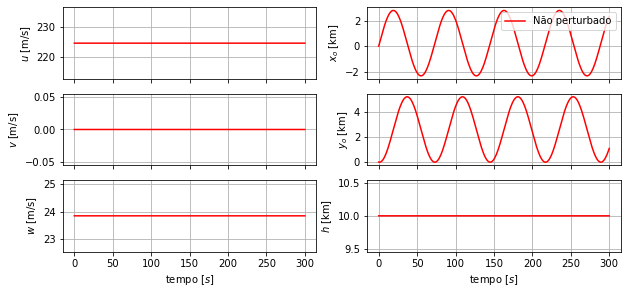

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, figsize=(10,4.5))
ax[0,0].plot(tempo1, np.around((solution1[:,3]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[0,0].set_ylabel(r'$u$ [m/s]')
ax[0,0].grid()

ax[1,0].plot(tempo1, np.around((solution1[:,4]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[1,0].set_ylabel(r'$v$ [m/s]')
ax[1,0].grid()

ax[2,0].plot(tempo1, np.around((solution1[:,5]), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[2,0].set_ylabel(r'$w$ [m/s]')
ax[2,0].set_xlabel(r'tempo $[s]$')
ax[2,0].grid()

ax[0, 1].plot(tempo1, np.around((solution1[:,0]/1000), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[0, 1].set_ylabel(r'$x_o$ [km]')
ax[0, 1].legend(loc = 'upper right')
ax[0, 1].grid()

ax[1, 1].plot(tempo1, np.around((solution1[:,1]/1000), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[1, 1].set_ylabel(r'$y_o$ [km]')
ax[1, 1].grid()

ax[2, 1].plot(tempo1, np.around((-solution1[:,2]/1000), decimals=4), label = r'Não perturbado', color = 'r', linestyle = '-')
ax[2, 1].set_ylabel(r'$h$ [km]')
ax[2, 1].set_xlabel(r'tempo $[s]$')
ax[2, 1].grid()

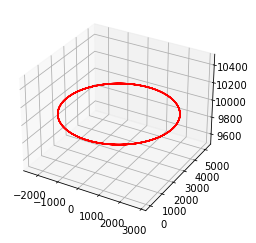

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(np.around(solution1[:,0], decimals=4), np.around(solution1[:,1], decimals=4), np.around(-solution1[:,2], decimals=4), 'red')

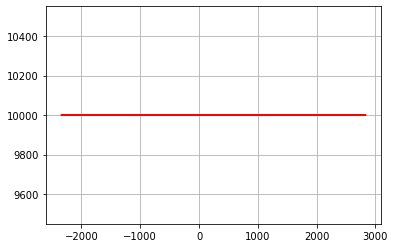

In [27]:
plt.figure()
plt.plot(np.around(solution1[:,0], decimals=4), np.around(-solution1[:,2], decimals=4), 'red')
plt.grid()

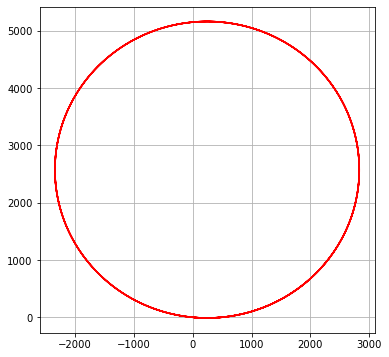

In [28]:
plt.figure(figsize= (6,6))
plt.plot(np.around(solution1[:,0], decimals=4), np.around(solution1[:,1], decimals=4), 'red')
plt.grid()